# Notebook to plot general distributions
**These are for the 'control plots' section in the note**

In [8]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import uproot
import uproot3
import R2h_module as r2h
import root_pandas as rpd
from root_pandas import read_root
from matplotlib import rc
import seaborn as sns
import cupy as cp, math, pylab
import os, os.path
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'
from matplotlib.colors import LogNorm ## this is for the 2d plots distributions 

In [9]:
# defining the edges and number of bins for each variable.
dpionMassBins=11
maxzmass=1.7
minzmass=0.3

dpiondphiBins=9
maxdphi=3.14
mindphi=0.0

dpionz2Bins=9
maxz2=0.45
minz2=0.05


In [10]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

# Getting Data

In [11]:
%%time
df = {}
df_trigger = {}
#path_data="/home/seba/CreatePairTuples"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    df['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    df_trigger['%s_trigger'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    df_trigger['D_%s_trigger'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C
Get trigger dataframes from deuterium target C
Getting dataframes from target Fe
Get trigger dataframes from deuterium target Fe
Getting dataframes from target Pb
Get trigger dataframes from deuterium target Pb
CPU times: user 4.07 s, sys: 144 ms, total: 4.21 s
Wall time: 4.21 s


# Getting GiBUU

In [12]:
%%time

pathGIBUU="/home/miguel/eg2dihadron/"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    df_trigger['GiBUU_%s_trigger'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    df['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (df.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])
CPU times: user 14.6 s, sys: 358 ms, total: 14.9 s
Wall time: 14.9 s


# Apply selection to datasets


In [13]:
%%time
for key in df.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    df[key] = r2h.applyCuts(df[key],isMC=isMC)
    df[key] = r2h.applyCutsPair(df[key],isMC=isMC)
    
for key in df_trigger.keys():
    print (key)
    df_trigger[key] = r2h.applyCuts(df_trigger[key],isTrigger=True)
    print (' ')    


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
0.2<h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
2.2 < nu <4.2 129258  (98.23  %)
px in gamma* frame is <0.4 GeV 120575  (93.28  %)
10< h1_th<90 120573  (100.00  %)
Theta/P fiducial region selected for trigger 120573  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 120573  (100.00  %)
2.2 < nu < 4.2 120573  (100.00  %)
secondary hadrons are pions 120573  (100.00  %)
(h1_p+h2_p)/nu<1.0 120199  (99.69  %)
(h1_pid*h2_pid)<0, opposite charge pions 89585  (74.53  %)
kinematic limits for h2_z 88550  (98.84  %)
kinematic limits for dphi 88464  (99.90  %)
kinematic limits for pair_mass 88152  (99.65  %)
leading hadrons are pions 88152  (100.00  %)
0.2<h2_p<5.0 88152  (100.00  %)
0.2<h1_p<5.0 88152  (100.00  %)
px in gamma* frame is <0.4 GeV 88152  (100.00  %)
px in gamma* frame is <0.4 GeV 88152  (100.00  %)
10<h2_th<90 8801

secondary hadrons are pions 1198467  (56.39  %)
(h1_p+h2_p)/nu<1.0 1198110  (99.97  %)
(h1_pid*h2_pid)<0, opposite charge pions 1090724  (91.04  %)
kinematic limits for h2_z 1035418  (94.93  %)
kinematic limits for dphi 1034407  (99.90  %)
kinematic limits for pair_mass 1026857  (99.27  %)
leading hadrons are pions 1026857  (100.00  %)
0.2<h2_p<5.0 888418  (86.52  %)
0.2<h1_p<5.0 888418  (100.00  %)

key:  GiBUU_Fe
Entries before cut  1014645
Q2>1.0 and Q2<4.0 1014170  (99.95  %)
0.2<h1_p<5.0  1014170  (100.00  %)
inelasticity < 0.85 1014170  (100.00  %)
h1_pid = pions (trigger) 1014170  (100.00  %)
2.2 < nu <4.2 968711  (95.52  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 968711  (100.00  %)
2.2 < nu < 4.2 968711  (100.00  %)
secondary hadrons are pions 509347  (52.58  %)
(h1_p+h2_p)/nu<1.0 509129  (99.96  %)
(h1_pid*h2_pid)<0, opposite charge pions 452315  (88.84  %)
kinematic limits for h2_z 424254  (93.80  %)
kinematic limits for dphi 423806  (99.89  %)
kinemati

**Combine deuterium data sets**

In [14]:
df['D'] = pd.concat([df['D_Pb'],df['D_Fe'],df['D_C']])

<ipython-input-14-9edfd7fb9589>:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df['D'] = pd.concat([df['D_Pb'],df['D_Fe'],df['D_C']])


In [15]:
p_thr=2.7
Nphe_thr=15
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

pair_cut_nom  ='and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h2_FidCut==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
trigger_cut_nom   ='h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

for j,target in enumerate(['D','C','Fe','Pb']):    
    df[target].eval('h_z=h1_z+h2_z', inplace=True)
    df[target].eval('h1_e = h1_z*nu', inplace=True)
    df[target].eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
    df[target].eval('h2_e = h2_z*nu', inplace=True)
    df[target].eval('h2_p = sqrt(h2_e*h2_e-0.13957*0.13957)', inplace=True)
    df['GiBUU_%s'%target].eval('h_z=h1_z+h2_z', inplace=True)
    df['GiBUU_%s'%target].eval('h1_e = h1_z*nu', inplace=True)
    df['GiBUU_%s'%target].eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
    df['GiBUU_%s'%target].eval('h2_e = h2_z*nu', inplace=True)
    df['GiBUU_%s'%target].eval('h2_p = sqrt(h2_e*h2_e-0.13957*0.13957)', inplace=True)


In [16]:
queryAllPairs    = 'Q2>1.0 %s'%pair_cut_nom
queryAllPosPions = 'Q2>1.0 %s and h1_pid==211 and abs(h2_pid)==211'%pair_cut_nom
queryAllNegPions = 'Q2>1.0 %s and h1_pid==-211 and abs(h2_pid)==211'%pair_cut_nom
## cuts for GiBUU
queryAllPairs_GiBUU       = 'Q2>1.0 and h1_z>0.5 and (h1_z+h2_z)<1.0 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s'%(minz2,maxz2,maxzmass ,minzmass)
queryAllPosPions_GiBUU    = 'Q2>1.0 and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211 and (h1_z+h2_z)<1.0 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s'%(minz2,maxz2,maxzmass ,minzmass)
queryAllNegPions_GiBUU    = 'Q2>1.0 and h1_z>0.5 and h1_pid==-211 and abs(h2_pid)==211 and (h1_z+h2_z)<1.0 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s'%(minz2,maxz2,maxzmass ,minzmass)


**Definition of the functions**

In [17]:
def plot_z2(  query_arg , outname ):
    fig = plt.figure( figsize=(15, 12) )
    labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair $p_{T}$',r'$\Delta \phi_{pq}$','$z_{tot}$', 'dipion mass']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p', 'h1_th','h2_th', 'pair_pt','dphi', 'h_z' ,'pair_mass']):
        plt.subplot(4,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
        
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'$z_{2}$',fontsize=15)
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.04,0.5])
        if ivar==0:    
            plt.gca().set_ylim(top=2.5)
            plt.gca().set_ylim(bottom=1)
        if ivar==1:    
            plt.gca().set_ylim(top=0.5)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.8)  
            plt.gca().set_ylim(bottom=0.5)
        if ivar==4:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==6:    
            plt.gca().set_ylim(top=80)
            plt.gca().set_ylim(bottom=0.)
        if ivar==7:    
            plt.gca().set_ylim(top=80.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==8:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)
        if ivar==9:    
            plt.gca().set_ylim(top=3)  
            plt.gca().set_ylim(bottom=0)            
        if ivar==10:    
            plt.gca().set_ylim(top=1.1)  
            plt.gca().set_ylim(bottom=0.5)        
        if ivar==11:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)        
            
        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()
    #plt.savefig('ProfilePlots_z2_1.png', bbox_inches='tight')
    #plt.savefig('ProfilePlots_z2_1.pdf', bbox_inches='tight')
    
    plt.savefig(outname, bbox_inches='tight')
    
    plt.show()
    return 

In [18]:
def plot_dphi(  query_arg , outname ):
    fig = plt.figure( figsize=(15, 12) )
    labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair $p_{T}$',r'$z_{2}$','$z_{tot}$', 'dipion mass']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p', 'h1_th','h2_th', 'pair_pt','h2_z', 'h_z' ,'pair_mass']):
        plt.subplot(4,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)    
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([-0.1,3.2])
        if ivar==0:    
            plt.gca().set_ylim(top=2.5)
            plt.gca().set_ylim(bottom=1)
        if ivar==1:    
            plt.gca().set_ylim(top=0.5)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.8)  
            plt.gca().set_ylim(bottom=0.5)
        if ivar==4:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==6:    
            plt.gca().set_ylim(top=80)
            plt.gca().set_ylim(bottom=0.)
        if ivar==7:    
            plt.gca().set_ylim(top=80.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==8:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)
        if ivar==9:    
            plt.gca().set_ylim(top=0.5)  
            plt.gca().set_ylim(bottom=0)            
        if ivar==10:    
            plt.gca().set_ylim(top=1.1)  
            plt.gca().set_ylim(bottom=0.5)        
        if ivar==11:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)        
            
        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()
    #plt.savefig('ProfilePlots_z2_1.png', bbox_inches='tight')
    #plt.savefig('ProfilePlots_z2_1.pdf', bbox_inches='tight')
    
    plt.savefig( outname, bbox_inches='tight')
    
    plt.show()    

    return

In [19]:
def plot_dipionMass(  query_arg , outname ):
    
    fig = plt.figure( figsize=(15, 12) )
    labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair $p_{T}$',r'$z_{2}$','$z_{tot}$', r'$\Delta \phi_{pq}$']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p', 'h1_th','h2_th', 'pair_pt','h2_z', 'h_z' ,'dphi']):
        plt.subplot(4,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'Dipion mass [GeV]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.25,1.82]) 
        if ivar==0:    
            plt.gca().set_ylim(top=2.5)
            plt.gca().set_ylim(bottom=1)
        if ivar==1:    
            plt.gca().set_ylim(top=0.5)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.8)  
            plt.gca().set_ylim(bottom=0.5)
        if ivar==4:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==6:    
            plt.gca().set_ylim(top=80)
            plt.gca().set_ylim(bottom=0.)
        if ivar==7:    
            plt.gca().set_ylim(top=80.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==8:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)
        if ivar==9:    
            plt.gca().set_ylim(top=0.5)  
            plt.gca().set_ylim(bottom=0)            
        if ivar==10:    
            plt.gca().set_ylim(top=1.1)  
            plt.gca().set_ylim(bottom=0.5)        
        if ivar==11:    
            plt.gca().set_ylim(top=3.2)
            plt.gca().set_ylim(bottom=-0.1)        
            
        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()
    #plt.savefig('ProfilePlots_z2_1.png', bbox_inches='tight')
    #plt.savefig('ProfilePlots_z2_1.pdf', bbox_inches='tight')
    
    plt.savefig(outname, bbox_inches='tight')
    
    plt.show()    

    return

In [21]:
#plot_z2(queryAllPairs+' and h2_z>0.05 and h2_z<0.45' , 'Profile_AllPairs_data_z2.pdf')
#plot_dphi(queryAllPairs + 'and  h2_z>0.1', 'Profile_AllPairs_data_dphi.pdf')
#plot_dipionMass( queryAllPairs , 'Profile_AllPairs_data_dipionMass.pdf')

In [22]:
#plot_z2(queryAllPosPions +' and h2_z>0.05 and h2_z<0.45' , 'Profile_PosPionsTrigger_data_z2.pdf')
#plot_dphi(queryAllPosPions + 'and  h2_z>0.1', 'Profile_PosPionsTrigger_data_dphi.pdf')
#plot_dipionMass( queryAllPosPions , 'Profile_PosPionsTrigger_data_dipionMass.pdf')

In [23]:
#plot_z2(queryAllNegPions +' and h2_z>0.05 and h2_z<0.45' , 'Profile_NegPionsTrigger_data_z2.pdf')
#plot_dphi(queryAllNegPions + 'and  h2_z>0.1', 'Profile_NegPionsTrigger_data_dphi.pdf')
#plot_dipionMass( queryAllNegPions , 'Profile_NegPionsTrigger_data_dipionMass.pdf')

In [24]:
print(df['C'].keys())

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_Chi2CC',
       'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'evnt', 'inelasticity', 'h1_e',
       'h1_p', 'z_tot', 'h2_e', 'h2_p', 'pair_pt2', 'h_z'],
      dtype='object')


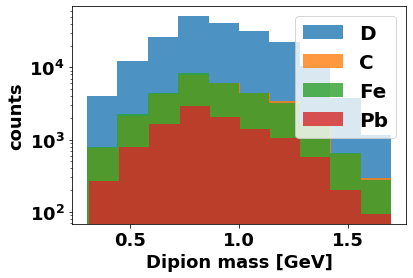

In [25]:
extra_cut = ' and ( (h2_pid==211) or (h2_pid==-211 and h2_th>25 and h2_th<90) or (h2_pid==-211 and h2_th<40 and h2_th>25 and h2_p>0.5))'

for i,target in enumerate(['D','C','Fe','Pb']):
    
    y, x, _ = plt.hist(df[target].query('Q2>1 '+pair_cut_nom)['pair_mass'],alpha=0.8,lw=2,
                       bins=10,  label=target, density=False)

#plt.xlim(10,30)  
plt.yscale('log')
#plt.xticks(rotation='vertical')
plt.xlabel('Dipion mass [GeV]',fontweight='bold' )
plt.ylabel('counts',fontweight='bold' )
plt.legend()    
plt.show()

# <span style="color:red">Using GiBUU</span>

In [26]:
def plot_z2_GiBUU(  query_arg , outname ):
    fig = plt.figure( figsize=(15, 12) )
    labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$','pair $p_{T}$',r'$\Delta \phi_{pq}$','dipion mass']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p',  'pair_pt','dphi', 'pair_mass']):
        plt.subplot(3,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                        x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
        
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'$z_{2}$',fontsize=15)
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.04,0.5])
        if ivar==0:    
            plt.gca().set_ylim(top=2.5)
            plt.gca().set_ylim(bottom=1)
        if ivar==1:    
            plt.gca().set_ylim(top=0.5)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.8)  
            plt.gca().set_ylim(bottom=0.5)
        if ivar==4:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==6:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)
        if ivar==7:    
            plt.gca().set_ylim(top=3)  
            plt.gca().set_ylim(bottom=0)            
        if ivar==8:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)        
            
        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()
    #plt.savefig('ProfilePlots_z2_1.png', bbox_inches='tight')
    #plt.savefig('ProfilePlots_z2_1.pdf', bbox_inches='tight')
    
    plt.savefig(outname, bbox_inches='tight')
    
    plt.show()
    return 

In [27]:
def plot_dphi_GiBUU(  query_arg , outname ):
    fig = plt.figure( figsize=(15, 12) )
    labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$', 'pair $p_{T}$',r'$z_{2}$', 'dipion mass']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p', 'pair_pt','h2_z','pair_mass']):
        plt.subplot(3,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                        x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)    
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([-0.1,3.2])
        if ivar==0:    
            plt.gca().set_ylim(top=2.5)
            plt.gca().set_ylim(bottom=1)
        if ivar==1:    
            plt.gca().set_ylim(top=0.5)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.8)  
            plt.gca().set_ylim(bottom=0.5)
        if ivar==4:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==6:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)
        if ivar==7:    
            plt.gca().set_ylim(top=0.5)  
            plt.gca().set_ylim(bottom=0)            
        if ivar==8:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)        
            
        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()
    #plt.savefig('ProfilePlots_z2_1.png', bbox_inches='tight')
    #plt.savefig('ProfilePlots_z2_1.pdf', bbox_inches='tight')
    
    plt.savefig( outname, bbox_inches='tight')
    
    plt.show()    

    return

In [28]:
def plot_dipionMass_GiBUU(  query_arg , outname ):
    
    fig = plt.figure( figsize=(15, 12) )
    labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$','pair $p_{T}$',r'$z_{2}$',r'$\Delta \phi_{pq}$']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p', 'pair_pt','h2_z', 'dphi']):
        plt.subplot(3,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'Dipion mass [GeV]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.25,1.82]) 
        if ivar==0:    
            plt.gca().set_ylim(top=2.5)
            plt.gca().set_ylim(bottom=1)
        if ivar==1:    
            plt.gca().set_ylim(top=0.5)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.8)  
            plt.gca().set_ylim(bottom=0.5)
        if ivar==4:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)        
        if ivar==6:    
            plt.gca().set_ylim(top=1.5)
            plt.gca().set_ylim(bottom=0.)
        if ivar==7:    
            plt.gca().set_ylim(top=0.5)  
            plt.gca().set_ylim(bottom=0)            
        if ivar==8:    
            plt.gca().set_ylim(top=3.2)
            plt.gca().set_ylim(bottom=-0.1)        
            
        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()
    plt.savefig(outname, bbox_inches='tight')
    
    plt.show()    

    return

In [29]:
#plot_z2_GiBUU(queryAllPairs_GiBUU +' and h2_z>0.05 and h2_z<0.45' , 'Profile_AllPairs_GiBUU_z2.pdf')
#plot_dphi_GiBUU(queryAllPairs_GiBUU + 'and  h2_z>0.1', 'Profile_AllPairs_GiBUU_dphi.pdf')
#plot_dipionMass_GiBUU( queryAllPairs_GiBUU , 'Profile_AllPairs_GiBUU_dipionMass.pdf')

In [30]:
#plot_z2_GiBUU(queryAllPosPions_GiBUU +' and h2_z>0.05 and h2_z<0.45' , 'Profile_PosPionsTrigger_GiBUU_z2.pdf')
#plot_dphi_GiBUU(queryAllPosPions_GiBUU + 'and  h2_z>0.1', 'Profile_PosPionsTrigger_GiBUU_dphi.pdf')
#plot_dipionMass_GiBUU( queryAllPosPions_GiBUU , 'Profile_PosPionsTrigger_GiBUU_dipionMass.pdf')

In [31]:
#plot_z2_GiBUU(queryAllNegPions_GiBUU +' and h2_z>0.05 and h2_z<0.45' , 'Profile_NegPionsTrigger_GiBUU_z2.pdf')
#plot_dphi_GiBUU(queryAllNegPions_GiBUU + 'and  h2_z>0.1', 'Profile_NegPionsTrigger_GiBUU_dphi.pdf')
#plot_dipionMass_GiBUU( queryAllNegPions_GiBUU , 'Profile_NegPionsTrigger_GiBUU_dipionMass.pdf')

# <span style="color:red">2D Distributions Control Plots</span>

In [32]:
def plot2D(query_arg, outname, depVar):
    fig = plt.figure( figsize=(15, 15) )
    if depVar=='pair_mass':
        labelX= r'Dipion mass [GeV]'
        lowLim=0
        upLim =2.0
        variables=['Q2','x','nu', 'h1_z','h1_p','h2_p', 'h1_th','h2_th', 'pair_pt','dphi', 'h_z' ,'h2_z' ]
        labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair $p_{T}$',r'$\Delta \phi_{pq}$','$z_{tot}$', r'$z_{2}$']
    if depVar=='dphi':
        labelX= r'$\Delta \phi_{pq}$ [rad]'
        lowLim=0
        upLim =3.2  
        variables=['Q2','x','nu', 'h1_z','h1_p','h2_p', 'h1_th','h2_th', 'pair_pt','pair_mass', 'h_z' ,'h2_z' ]
        labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair $p_{T}$','dipion mass','$z_{tot}$', r'$z_{2}$']
    if depVar=='h2_z':
        labelX= r'$z_{2}}$'
        lowLim=0.05
        upLim =0.5   
        variables=['Q2','x','nu', 'h1_z','h1_p','h2_p', 'h1_th','h2_th', 'pair_pt','dphi', 'h_z' ,'pair_mass' ]
        labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair $p_{T}$',r'$\Delta \phi_{pq}$','$z_{tot}$', 'dipion mass']
    
    for ivar,variable in enumerate(variables):
        plt.subplot(4,3,ivar+1)
        query=query_arg
        h =plt.hist2d(df['Fe'].query(query)[depVar], df['Fe'].query(query)[variable], 
                  bins=(100, 100), cmap=plt.cm.viridis, norm=LogNorm())    
        
        plt.xlabel(labelX,fontsize=14,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=14,fontweight='bold')
        plt.tick_params(axis='both', which='major', labelsize=11)
        plt.colorbar().ax.tick_params(labelsize=10)     
        plt.xlim(lowLim,upLim) 
    plt.savefig(outname, bbox_inches='tight') 
    plt.show()
    return
    

In [25]:
#plot2D(queryAllPairs+' and h2_z>0.05 and h2_z<0.45' , '2D_AllPairs_z2.png', 'h2_z')

In [26]:
#plot2D(queryAllPairs+' and h2_z>0.1' , '2D_AllPairs_dphi.png', 'dphi')

In [27]:
#plot2D(queryAllPairs , '2D_AllPairs_dipionMass.png', 'pair_mass')

In [28]:
#plot2D(queryAllPosPions+' and h2_z>0.05 and h2_z<0.45' , '2D_AllPosPions_z2.png', 'h2_z')

In [29]:
#plot2D(queryAllPosPions+' and h2_z>0.1' , '2D_AllPosPions_dphi.png', 'dphi')

In [30]:
#plot2D(queryAllPosPions , '2D_AllPosPions_dipionMass.png', 'pair_mass')

In [31]:
#plot2D(queryAllNegPions +' and h2_z>0.05 and h2_z<0.45' , '2D_AllNegPions_z2.png', 'h2_z')

In [32]:
#plot2D(queryAllNegPions+' and h2_z>0.1' , '2D_AllNegPions_dphi.png', 'dphi')

In [33]:
#plot2D(queryAllNegPions , '2D_AllNegPions_dipionMass.png', 'pair_mass')

**Selecting some cases for a direct comparison**

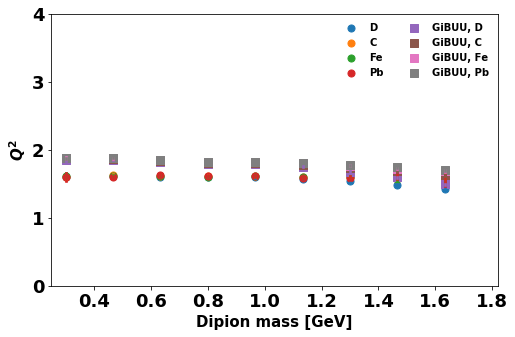

In [34]:
    fig = plt.figure( figsize=(8, 5) )
    labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$z_{1}$','$p_{1}$','$p_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair $p_{T}$',r'$z_{2}$','$z_{tot}$', r'$\Delta \phi_{pq}$']
    for ivar,variable in enumerate(['Q2']):
        plt.subplot(1,1,ivar+1)
        query=queryAllPairs
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU)['pair_mass'],
                        y=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target, marker='s')
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'Dipion mass [GeV]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.25,1.82])     
        plt.ylim([0.,4])     
    


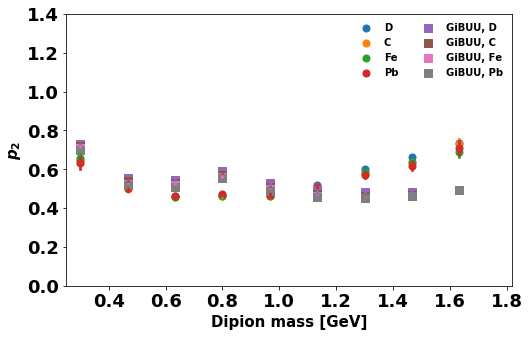

In [35]:
    fig = plt.figure( figsize=(8, 5) )
    labelsy=['$p_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair $p_{T}$',r'$z_{2}$','$z_{tot}$', r'$\Delta \phi_{pq}$']
    for ivar,variable in enumerate(['h2_p']):
        plt.subplot(1,1,ivar+1)
        query=queryAllPairs+' and h1_z+h2_z<0.9'
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU+' and h1_z+h2_z<0.9')['pair_mass'],
                        y=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU+' and h1_z+h2_z<0.9')[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target, marker='s')
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'Dipion mass [GeV]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.25,1.82])     
        plt.ylim([0.,1.4])     
    


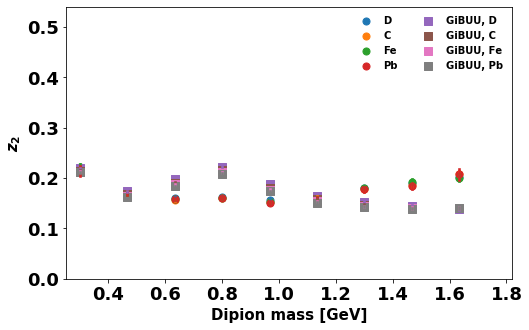

In [36]:
    fig = plt.figure( figsize=(8, 5) )
    labelsy=[r'$z_{2}$','$z_{tot}$', r'$\Delta \phi_{pq}$']
    for ivar,variable in enumerate(['h2_z']):
        plt.subplot(1,1,ivar+1)
        query=queryAllPairs
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU)['pair_mass'],
                        y=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target, marker='s')
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'Dipion mass [GeV]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.25,1.82])     
        plt.ylim([0.,0.54])     
    


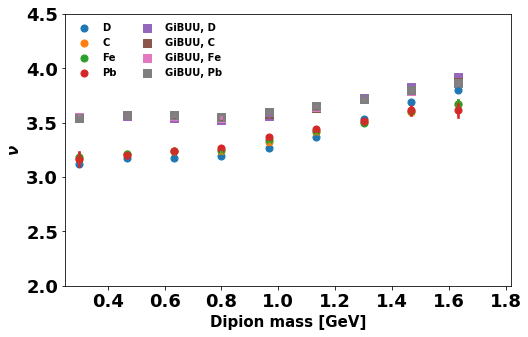

In [37]:
    fig = plt.figure( figsize=(8, 5) )
    labelsy=[r'$\nu$','$z_{tot}$', r'$\Delta \phi_{pq}$']
    for ivar,variable in enumerate(['nu']):
        plt.subplot(1,1,ivar+1)
        query=queryAllPairs
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU)['pair_mass'],
                        y=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU)[variable],
                        x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target, marker='s')
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'Dipion mass [GeV]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.25,1.82])     
        plt.ylim([2.,4.5])     
    


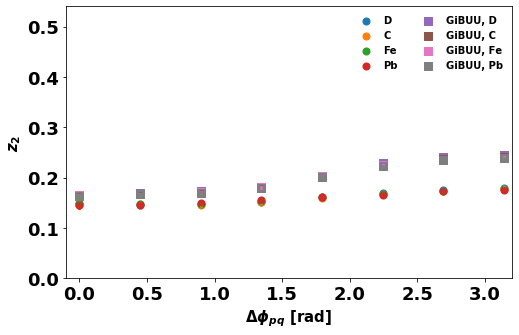

In [38]:
    fig = plt.figure( figsize=(8, 5) )
    labelsy=[r'$z_{2}$', 'dipion mass']
    for ivar,variable in enumerate(['h2_z']):
        plt.subplot(1,1,ivar+1)
        query=queryAllPairs + 'and  h2_z>0.1'
        
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(queryAllPairs)['dphi'],
                        y=df[target].query(queryAllPairs)[variable],
                        x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)    
        
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU + 'and  h2_z>0.1')['dphi'],
                        y=df['GiBUU_%s'%target].query(queryAllPairs_GiBUU + 'and  h2_z>0.1')[variable],
                        x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target, marker='s')    
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([-0.1,3.2])
        plt.ylim([0.,0.54])     
        

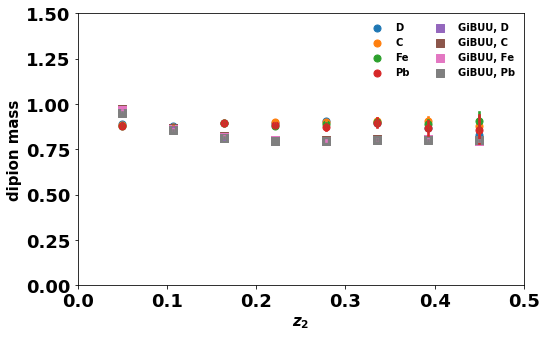

In [39]:
    fig = plt.figure( figsize=(8, 5) )
    labelsy=['dipion mass']
    for ivar,variable in enumerate(['pair_mass']):
        plt.subplot(1,1,ivar+1)
        query=queryAllNegPions +' and h2_z>0.05 and h2_z<0.45'
        query_GiBUU=queryAllPairs_GiBUU +' and h2_z>0.05 and h2_z<0.45'
        
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df[target].query(queryAllPairs)['h2_z'],
                        y=df[target].query(queryAllPairs)[variable],
                        x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)    
        
        for i, target in enumerate(['D','C','Fe','Pb']):
            sns.regplot(x=df['GiBUU_%s'%target].query(query_GiBUU)['h2_z'],
                        y=df['GiBUU_%s'%target].query(query_GiBUU)[variable],
                        x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target, marker='s')    
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'$z_{2}$',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.0,0.5])
        plt.ylim([0.,1.5])     
        

**A smaller version of the functions, (fewer plots)**

In [59]:
def regplot(x,y,x_bins,fit_reg,label):
    xs = []
    ys = []
    ymins=[]
    ymaxs=[]
    for i in range(len(x_bins)-1):
        sl =(x>=x_bins[i])&(x<x_bins[i+1])
        yy=y[sl]
        xs.append(np.mean(x[sl]))
        ys.append(np.mean(yy))
        ymaxs.append(np.max(yy))
        ymins.append(np.min(yy))
    a=plt.plot(xs, ys, marker='o', linestyle='',label=label)
    plt.plot(xs, ymins, marker='', linestyle='--', color=a[0].get_color())
    plt.plot(xs, ymaxs, marker='', linestyle='--', color=a[0].get_color())

In [73]:
def plot_z2_fewerPlots(  query_arg , outname, outdir='/home/seba/di-hadron/controlPlots_images/' ):
    fig = plt.figure( figsize=(15, 6) )
    labelsy=['Q$^{2}$','x$_{\mathrm{B}}$',r'$\nu$','z$_{1}$','p$_{1}$','p$_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair p$_{\mathrm{T}}$',r'$\Delta \phi_{\mathrm{pq}}$','z$_{\mathrm{tot}}$', '$\mathrm{dipion mass}$']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p']):
        plt.subplot(2,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(minz2,maxz2,dpionz2Bins-1),fit_reg=None,label=target)
        
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'z$_{2}$',fontsize=15, fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.04,0.5])
        if ivar==0:    
            plt.gca().set_ylim(top=4)
            plt.gca().set_ylim(bottom=0.9)
        if ivar==1:    
            plt.gca().set_ylim(top=0.7)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.95)  
            plt.gca().set_ylim(bottom=0.45)
        if ivar==4:    
            plt.gca().set_ylim(top=4.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)       

        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()
    if not os.path.isdir(outdir):
        os.mkdir(outdir)
    plt.savefig(outdir+outname, bbox_inches='tight')
    
    plt.show()
    return 

In [74]:
def plot_dphi_fewerPlots(  query_arg , outname , outdir='/home/seba/di-hadron/controlPlots_images/'):
    fig = plt.figure( figsize=(15, 6) )
    labelsy=['Q$^{2}$','x$_{\mathrm{B}}$',r'$\nu$','z$_{1}$','p$_{1}$','p$_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair p$_{\mathrm{T}}$',r'$\Delta \phi_{\mathrm{pq}}$','z$_{\mathrm{tot}}$', '$\mathrm{dipion mass}$']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p']):
        plt.subplot(2,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(mindphi,maxdphi,dpiondphiBins-1),fit_reg=None,label=target)    
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([-0.1,3.2])
        if ivar==0:    
            plt.gca().set_ylim(top=4)
            plt.gca().set_ylim(bottom=0.9)
        if ivar==1:    
            plt.gca().set_ylim(top=0.7)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.95)  
            plt.gca().set_ylim(bottom=0.45)
        if ivar==4:    
            plt.gca().set_ylim(top=4.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)         
                  
        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()
    if not os.path.isdir(outdir):
        os.mkdir(outdir)
    plt.savefig(outdir+outname, bbox_inches='tight')
    
    plt.show()    

    return

In [75]:
def plot_dipionMass_fewerPlots(  query_arg , outname , outdir='/home/seba/di-hadron/controlPlots_images/'):
    
    fig = plt.figure( figsize=(15, 6) )
    labelsy=['Q$^{2}$','x$_{\mathrm{B}}$',r'$\nu$','z$_{1}$','p$_{1}$','p$_{2}$', r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','pair p$_{\mathrm{T}}$',r'$\Delta \phi_{\mathrm{pq}}$','z$_{\mathrm{tot}}$', '$\mathrm{dipion mass}$']
    for ivar,variable in enumerate(['Q2','x','nu', 'h1_z','h1_p','h2_p']):
        plt.subplot(2,3,ivar+1)
        query=query_arg
        for i, target in enumerate(['D','C','Fe','Pb']):
            
            regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                        x_bins=np.linspace(minzmass,maxzmass,dpionMassBins-1),fit_reg=None,label=target)
    
        plt.legend(loc='best',frameon=False, ncol=2, fontsize=10)
        plt.xlabel(r'Dipion mass [GeV]',fontsize=15,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=15,fontweight='bold')
        plt.xlim([0.25,1.82]) 
        if ivar==0:    
            plt.gca().set_ylim(top=4)
            plt.gca().set_ylim(bottom=0.9)
        if ivar==1:    
            plt.gca().set_ylim(top=0.7)
            plt.gca().set_ylim(bottom=0.1)
        if ivar==2:    
            plt.gca().set_ylim(top=4.5)
            plt.gca().set_ylim(bottom=2)
        if ivar==3:    
            plt.gca().set_ylim(top=0.95)  
            plt.gca().set_ylim(bottom=0.45)
        if ivar==4:    
            plt.gca().set_ylim(top=4.)
            plt.gca().set_ylim(bottom=0.)
        if ivar==5:    
            plt.gca().set_ylim(top=3.)
            plt.gca().set_ylim(bottom=0.)        
         
        plt.tick_params(axis='both', which='major', labelsize=11)
    plt.subplots_adjust(right=1, top=1, left=0.0)   
    
    plt.tight_layout()

    if not os.path.isdir(outdir):
        os.mkdir(outdir)
    plt.savefig(outdir+outname, bbox_inches='tight')
    
    plt.show()    

    return

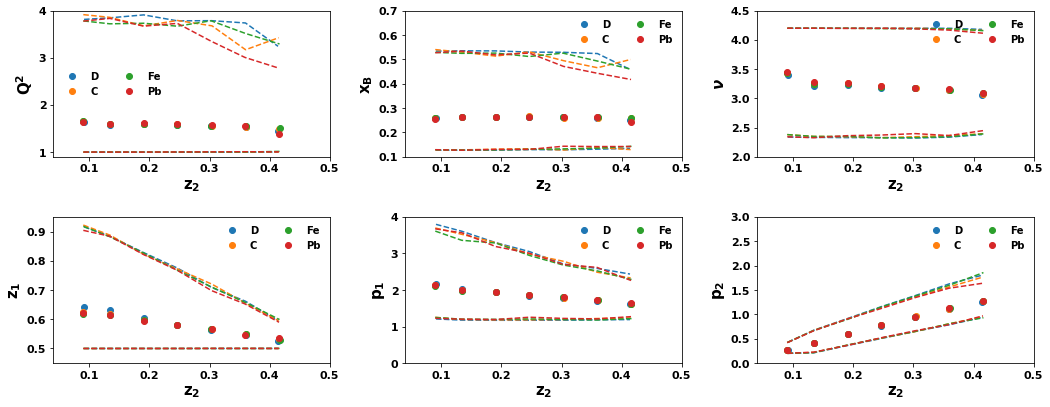

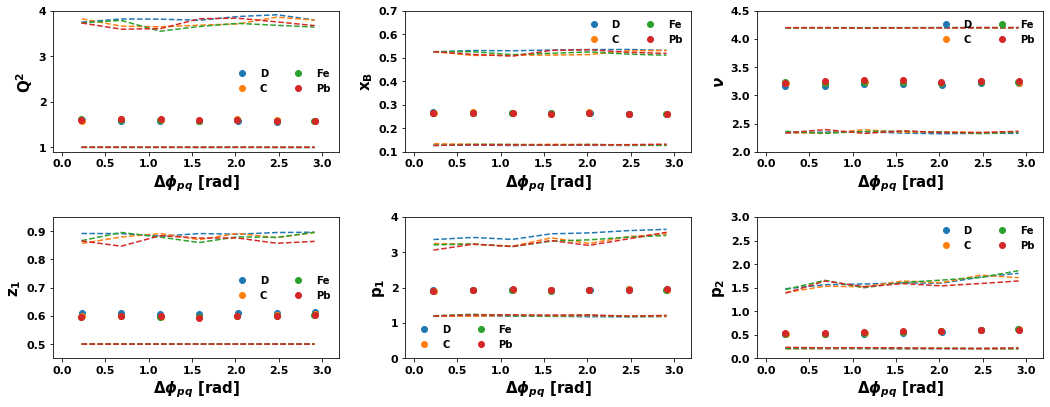

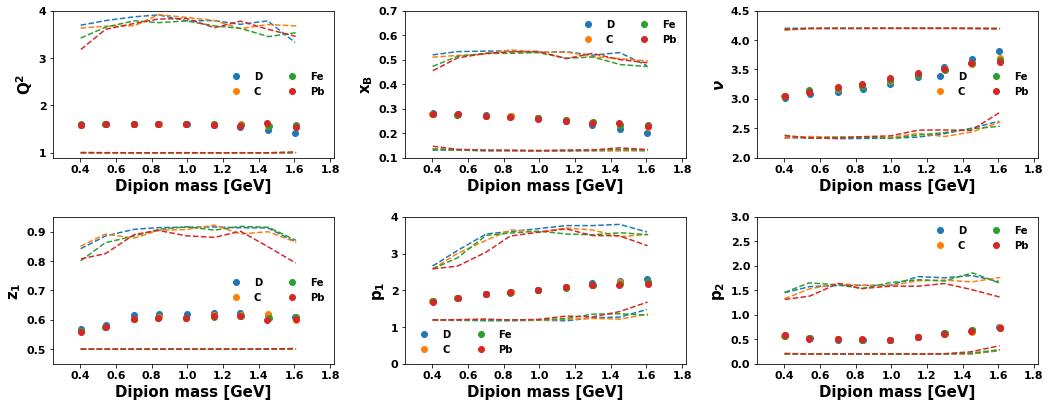

In [79]:
plot_z2_fewerPlots(queryAllPairs+' and h2_z>0.05 and h2_z<0.45' , 'Profile_AllPairs_data_z2.pdf',outdir='images/')
plot_dphi_fewerPlots(queryAllPairs + 'and  h2_z>0.1', 'Profile_AllPairs_data_dphi.pdf', outdir='images/')
plot_dipionMass_fewerPlots( queryAllPairs , 'Profile_AllPairs_data_dipionMass.pdf', outdir='images/')

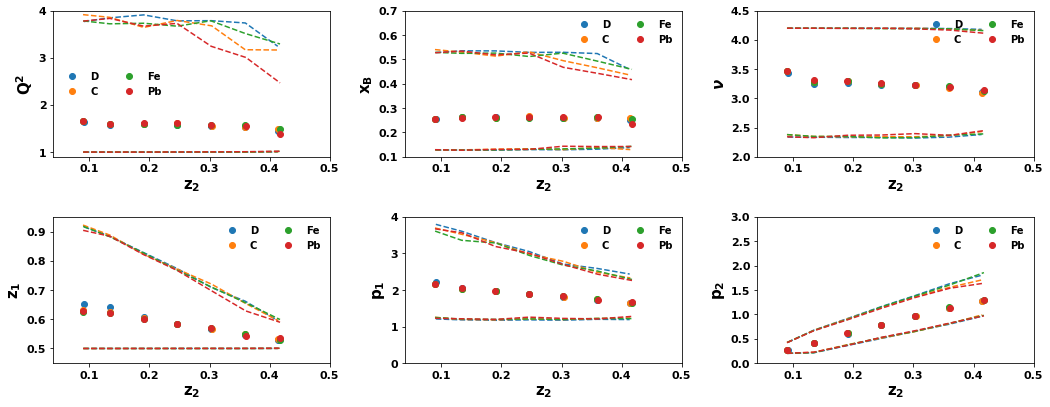

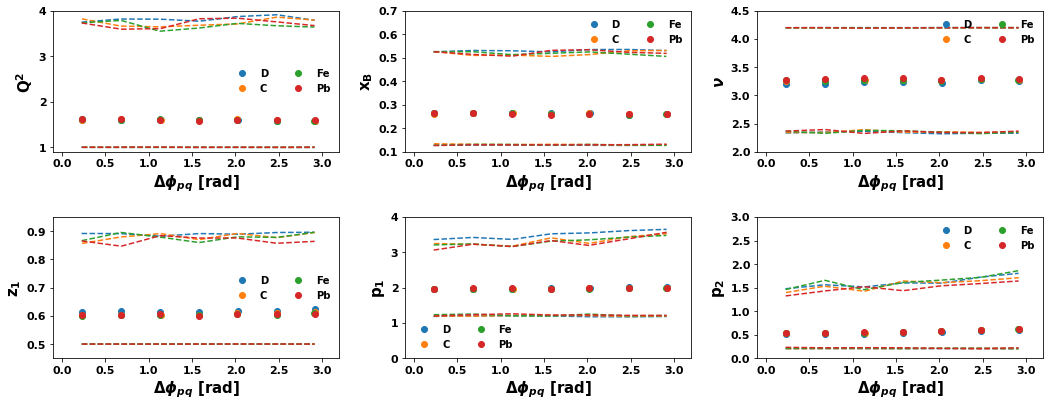

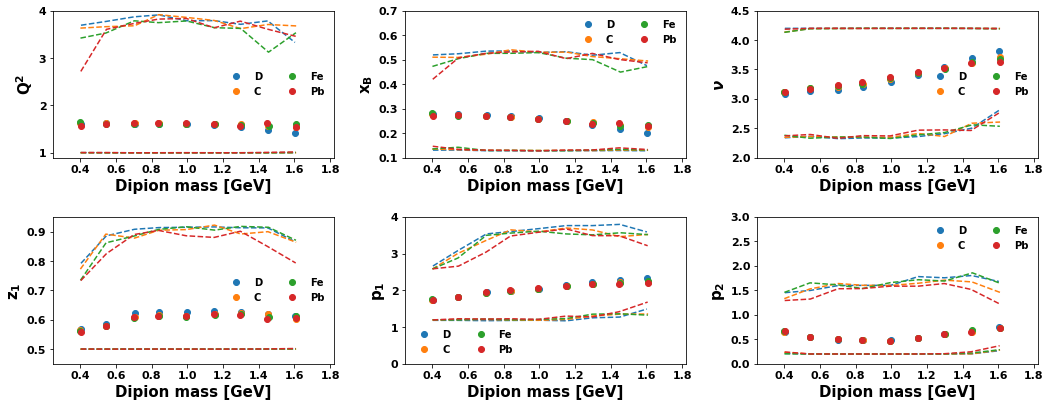

In [80]:
plot_z2_fewerPlots(queryAllPosPions +' and h2_z>0.05 and h2_z<0.45' , 'Profile_PosPionsTrigger_data_z2.pdf',outdir='images/')
plot_dphi_fewerPlots(queryAllPosPions + 'and  h2_z>0.1', 'Profile_PosPionsTrigger_data_dphi.pdf',outdir='images/')
plot_dipionMass_fewerPlots( queryAllPosPions , 'Profile_PosPionsTrigger_data_dipionMass.pdf',outdir='images/')

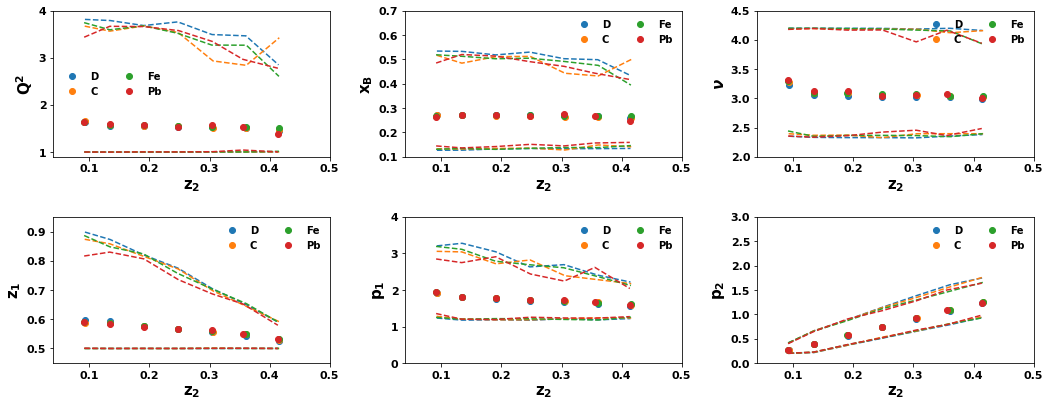

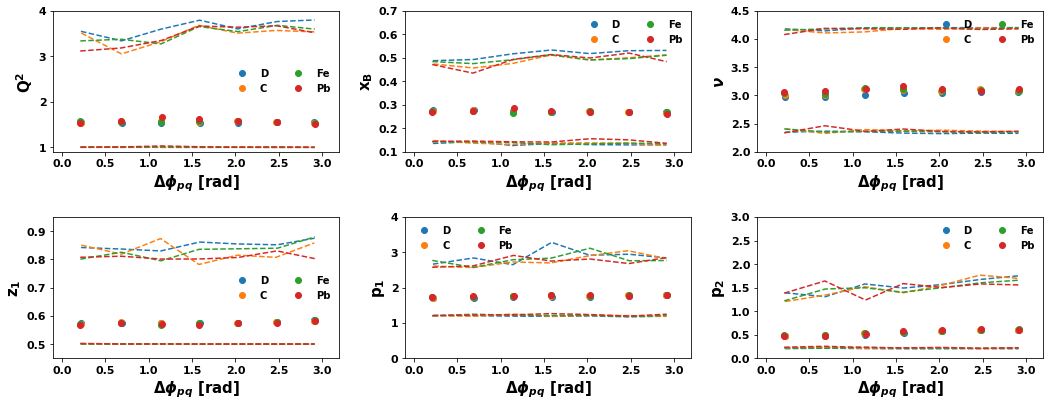

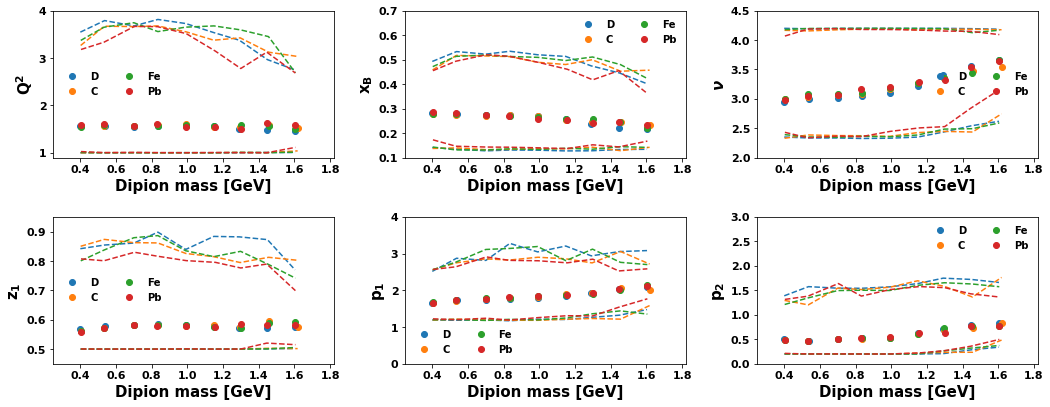

In [81]:
plot_z2_fewerPlots(queryAllNegPions +' and h2_z>0.05 and h2_z<0.45' , 'Profile_NegPionsTrigger_data_z2.pdf',outdir='images/')
plot_dphi_fewerPlots(queryAllNegPions + 'and  h2_z>0.1', 'Profile_NegPionsTrigger_data_dphi.pdf',outdir='images/')
plot_dipionMass_fewerPlots(queryAllNegPions , 'Profile_NegPionsTrigger_data_dipionMass.pdf',outdir='images/')


**2D plots, with fewer plots in each picture**

In [61]:
def plot2D_fewerPlots(query_arg, outname, depVar, outdir='/home/seba/di-hadron/controlPlots_images/'):
    fig = plt.figure( figsize=(15, 10) )
    if depVar=='pair_mass':
        labelX= r'Dipion mass [GeV]'
        lowLim=0
        upLim =2.0
        variables=['pair_pt','dphi', 'h_z' ]
        labelsy=[ 'pair p$_{\mathrm{T}}$',r'$\Delta \phi_{\mathrm{pq}}$','z$_{\mathrm{tot}}$']
    if depVar=='dphi':
        labelX= r'$\Delta \phi_{\mathrm{pq}}$ [rad]'
        lowLim=0
        upLim =3.2  
        variables=[  'h1_th','h2_th', 'h_z'  ]
        labelsy=[ r'$\theta_{1}$ lab', r'$\theta_{2}$ lab', '$z_{tot}$']
    if depVar=='h2_z':
        labelX= r'z$_{2}}$'
        lowLim=0.05
        upLim =0.5   
        variables=['h1_th','h2_th', 'h_z' ]
        labelsy=[r'$\theta_{1}$ lab', r'$\theta_{2}$ lab','z$_{\mathrm{tot}}$']
    
    for ivar,variable in enumerate(variables):
        plt.subplot(4,3,ivar+1)
        query=query_arg
        h =plt.hist2d(df['Fe'].query(query)[depVar], df['Fe'].query(query)[variable], 
                  bins=(100, 100), cmap=plt.cm.viridis, norm=LogNorm())    
        
        plt.xlabel(labelX,fontsize=14,fontweight='bold')
        plt.ylabel(labelsy[ivar],fontsize=14,fontweight='bold')
        plt.tick_params(axis='both', which='major', labelsize=11)
        plt.colorbar().ax.tick_params(labelsize=10)     
        plt.xlim(lowLim,upLim) 
        
    if not os.path.isdir(outdir):
        os.mkdir(outdir)
    plt.savefig(outdir+outname, bbox_inches='tight')
    
    plt.show()
    return
    

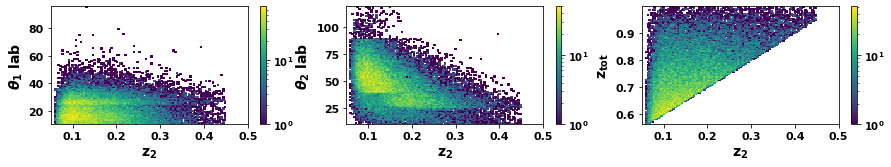

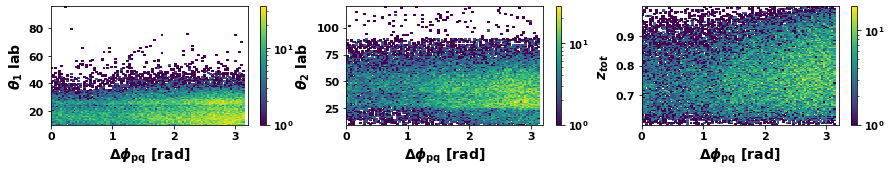

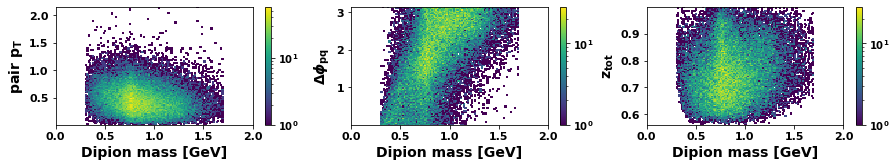

In [65]:
plot2D_fewerPlots(queryAllPairs+' and h2_z>0.05 and h2_z<0.45' , '2D_AllPairs_z2.png', 'h2_z')
plot2D_fewerPlots(queryAllPairs+' and h2_z>0.1' , '2D_AllPairs_dphi.png', 'dphi')
plot2D_fewerPlots(queryAllPairs , '2D_AllPairs_dipionMass.png', 'pair_mass')

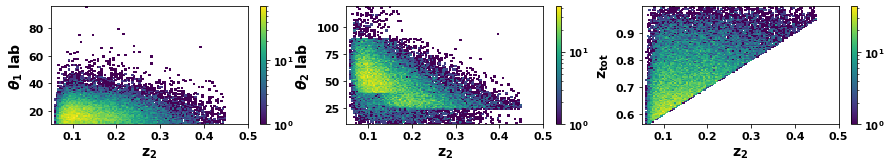

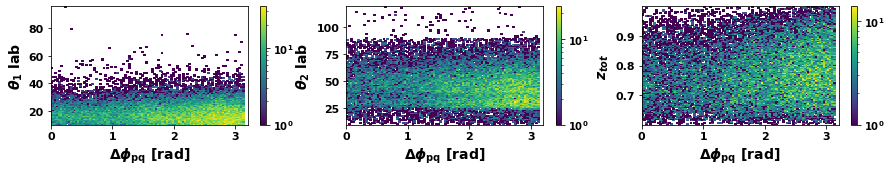

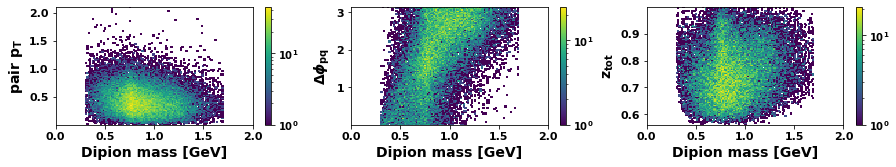

In [66]:
plot2D_fewerPlots(queryAllPosPions+' and h2_z>0.05 and h2_z<0.45' , '2D_AllPosPions_z2.png', 'h2_z')
plot2D_fewerPlots(queryAllPosPions+' and h2_z>0.1' , '2D_AllPosPions_dphi.png', 'dphi')
plot2D_fewerPlots(queryAllPosPions , '2D_AllPosPions_dipionMass.png', 'pair_mass')

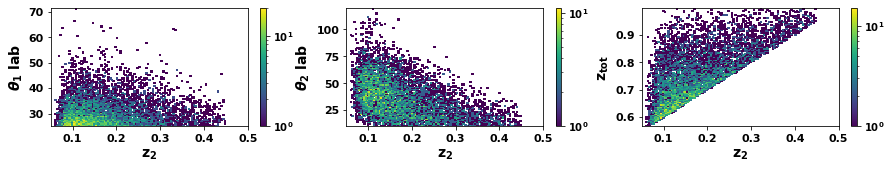

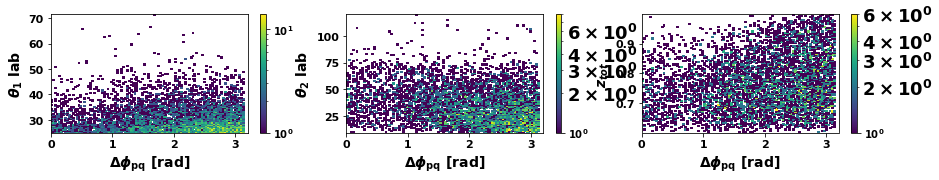

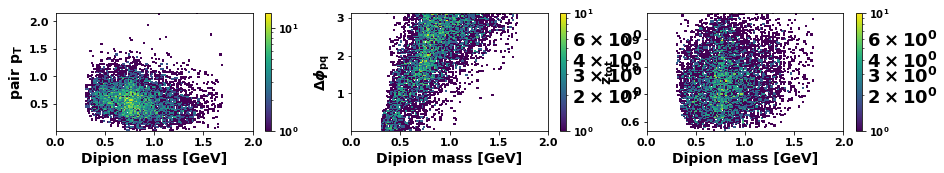

In [67]:
plot2D_fewerPlots(queryAllNegPions+' and h2_z>0.05 and h2_z<0.45' , '2D_AllNegPions_z2.png', 'h2_z')
plot2D_fewerPlots(queryAllNegPions+' and h2_z>0.1' , '2D_AllNegPions_dphi.png', 'dphi')
plot2D_fewerPlots(queryAllNegPions , '2D_AllNegPions_dipionMass.png', 'pair_mass')